In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings


pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')


pio.renderers.default = 'iframe'


pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 

    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),

)
 

pio.templates.default = 'ck_template+gridon'



# rapor için: örnek dökümanı indir 
# Soruları cevapla scope amaç vs gibi
# Related work kısmını doldur
# Karşılaştırma tablosunu doldur
# implementasyon kısmında algoritmaları anlat
# acc ve diğerlerini tanımla
# veri setini açıkla
# veri setinin temizlenmesini açıkla
# feature selection kısmını anlat
# testte neler yapıldı anlat her şeyi
# test tablolarını doldur


In [2]:
df = pd.read_csv('UNSWtrain.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [4]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,392,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,980,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,0,0,0.028,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,692,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.688,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.712,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


In [23]:
df["id"].head(10)

KeyError: ('id', 'attack_cat')

In [12]:
list_drop = ['id','attack_cat']

In [13]:
df[list_drop].value_counts().head()


id     attack_cat    
1      Normal            1
54836  Generic           1
54894  Generic           1
54893  Reconnaissance    1
54892  Shellcode         1
dtype: int64

In [7]:
list_drop = ['id','attack_cat'] #,'proto','state','service'
df.drop(list_drop,axis=1,inplace=True)

In [8]:

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.445016,11.84186,9.178424,1580.566135,2866.918367,71576.702810,180.967667,95.713003,4.649418e+07,3.105380e+05,2.188068,2.542729,37.836042,33.982038,1920.889858,199.566224,133.45908,1.074064e+09,1.062670e+09,128.28662,0.055925,0.029256,0.026669,124.772822,100.240891,0.092091,9.643063,9.259887,1.369273,5.269591,4.466611,3.388901,7.160679,0.008284,0.008381,0.092066,5.974809,8.832532,0.011126,0.550600
std,0.672222,15.66461,14.504212,2948.850472,7525.606738,102631.946851,101.513358,116.667722,7.417784e+07,8.918691e+05,3.057946,4.767511,57.658385,52.184248,2900.509949,520.285264,127.35700,1.368335e+09,1.358850e+09,127.49137,0.116022,0.070854,0.055094,148.294212,184.094183,0.289156,35.977508,10.221752,1.067188,6.729755,6.685037,5.029129,10.481621,0.091171,0.092485,0.289121,6.867156,10.124902,0.104891,0.497436
min,0.000000,1.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.00000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.00000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,17.623918,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.00000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.403792,60.00000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.741446e+06,11.000000,18.000000,204.530258,167.626851,9532.382646,2218.933526,255.00000,3.876194e+09,3.862459e+09,255.00000,3.821465,3.226788,2.928778,638.000000,683.000000,1.000000,150.450000,37.000000,6.000000,25.000000,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


In [11]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [12]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [13]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [14]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [15]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [16]:
df['service'].value_counts().index

Index(['-', 'dns', 'http', 'smtp', 'ftp'], dtype='object')

In [17]:
df['state'].value_counts().index

Index(['FIN', 'INT', 'CON', 'REQ', 'ACC', '-'], dtype='object')

In [18]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

In [19]:
X.head(10)

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
0,0.693147,0.0,6.206576,0.0,11.417626,254,0,19.010486,0.0,0.0,0.0,0.010940,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,5.513429,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,2.0,0,0,0.0,1.0,2.0
1,0.693147,0.0,7.474205,0.0,11.736077,254,0,19.401510,0.0,0.0,0.0,0.007968,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,2.0,0,0,0.0,1.0,2.0
2,0.693147,0.0,6.973543,0.0,12.206078,254,0,19.401510,0.0,0.0,0.0,0.004988,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.280396,0.0,0.0,0.0,3.0,2,1.0,1.0,1.0,3.0,0,0,0.0,1.0,3.0
3,0.693147,0.0,6.802395,0.0,12.023757,254,0,19.401510,0.0,0.0,0.0,0.005982,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.109248,0.0,0.0,0.0,3.0,2,2.0,2.0,1.0,3.0,0,0,0.0,2.0,3.0
4,0.693147,0.0,7.661998,0.0,11.512935,254,0,19.401510,0.0,0.0,0.0,0.009950,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,3.0,2,2.0,2.0,1.0,3.0,0,0,0.0,2.0,3.0
5,0.693147,0.0,6.664409,0.0,12.716901,254,0,19.401510,0.0,0.0,0.0,0.002996,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,5.971262,0.0,0.0,0.0,2.0,2,2.0,2.0,1.0,2.0,0,0,0.0,2.0,2.0
6,0.693147,0.0,7.580700,0.0,12.023757,254,0,19.401510,0.0,0.0,0.0,0.005982,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,2.0,2,2.0,2.0,1.0,2.0,0,0,0.0,2.0,2.0
7,0.693147,0.0,7.232733,0.0,10.483334,254,0,19.102334,0.0,0.0,0.0,0.027615,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,3.0,2,1.0,1.0,1.0,3.0,0,0,0.0,1.0,3.0
8,0.000000,0.0,3.828641,0.0,0.000000,0,0,0.000000,0.0,0.0,0.0,5.325593,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,3.828641,0.0,0.0,0.0,2.0,2,2.0,2.0,2.0,2.0,0,0,0.0,2.0,2.0
9,0.000000,0.0,3.828641,0.0,0.000000,0,0,0.000000,0.0,0.0,0.0,5.325593,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,3.828641,0.0,0.0,0.0,2.0,2,2.0,2.0,2.0,2.0,0,0,0.0,2.0,2.0


In [20]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [23]:
X.head()


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,udp,-,INT,0.693147,0.0,6.206576,0.0,11.417626,254,0,19.010486,0.0,0.0,0.0,0.010940,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,5.513429,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0
1,0.000008,udp,-,INT,0.693147,0.0,7.474205,0.0,11.736077,254,0,19.401510,0.0,0.0,0.0,0.007968,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0
2,0.000005,udp,-,INT,0.693147,0.0,6.973543,0.0,12.206078,254,0,19.401510,0.0,0.0,0.0,0.004988,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.280396,0.0,0.0,0.0,3.0,2,1.0,1.0,1.0,3.0,0,0,0.0,1.0,3.0,0
3,0.000006,udp,-,INT,0.693147,0.0,6.802395,0.0,12.023757,254,0,19.401510,0.0,0.0,0.0,0.005982,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.109248,0.0,0.0,0.0,3.0,2,2.0,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0
4,0.000010,udp,-,INT,0.693147,0.0,7.661998,0.0,11.512935,254,0,19.401510,0.0,0.0,0.0,0.009950,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,3.0,2,2.0,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0


In [24]:
list_drop = [ 'dbytes',
 'sttl',
 'dttl',
 'dload',
 'dloss',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'ct_srv_src',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_srv_dst',]
X.drop(list_drop,axis=1,inplace=True)
X.head()

,dur,proto,service,state,spkts,dpkts,sbytes,rate,sload,sloss,sinpkt,dinpkt,sjit,djit,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_state_ttl,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports
0,0.000011,udp,-,INT,0.693147,0.0,6.206576,11.417626,19.010486,0.0,0.010940,0.0,0.0,0.0,0.0,0.0,0.0,5.513429,0.0,0.0,0.0,2,0,0,0.0,0
1,0.000008,udp,-,INT,0.693147,0.0,7.474205,11.736077,19.401510,0.0,0.007968,0.0,0.0,0.0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,2,0,0,0.0,0
2,0.000005,udp,-,INT,0.693147,0.0,6.973543,12.206078,19.401510,0.0,0.004988,0.0,0.0,0.0,0.0,0.0,0.0,6.280396,0.0,0.0,0.0,2,0,0,0.0,0
3,0.000006,udp,-,INT,0.693147,0.0,6.802395,12.023757,19.401510,0.0,0.005982,0.0,0.0,0.0,0.0,0.0,0.0,6.109248,0.0,0.0,0.0,2,0,0,0.0,0
4,0.000010,udp,-,INT,0.693147,0.0,7.661998,11.512935,19.401510,0.0,0.009950,0.0,0.0,0.0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,2,0,0,0.0,0


In [25]:
X.head()
#X.to_csv("20FeaturesData.csv")

,dur,proto,service,state,spkts,dpkts,sbytes,rate,sload,sloss,sinpkt,dinpkt,sjit,djit,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_state_ttl,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports
0,0.000011,udp,-,INT,0.693147,0.0,6.206576,11.417626,19.010486,0.0,0.010940,0.0,0.0,0.0,0.0,0.0,0.0,5.513429,0.0,0.0,0.0,2,0,0,0.0,0
1,0.000008,udp,-,INT,0.693147,0.0,7.474205,11.736077,19.401510,0.0,0.007968,0.0,0.0,0.0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,2,0,0,0.0,0
2,0.000005,udp,-,INT,0.693147,0.0,6.973543,12.206078,19.401510,0.0,0.004988,0.0,0.0,0.0,0.0,0.0,0.0,6.280396,0.0,0.0,0.0,2,0,0,0.0,0
3,0.000006,udp,-,INT,0.693147,0.0,6.802395,12.023757,19.401510,0.0,0.005982,0.0,0.0,0.0,0.0,0.0,0.0,6.109248,0.0,0.0,0.0,2,0,0,0.0,0
4,0.000010,udp,-,INT,0.693147,0.0,7.661998,11.512935,19.401510,0.0,0.009950,0.0,0.0,0.0,0.0,0.0,0.0,6.458338,0.0,0.0,0.0,2,0,0,0.0,0


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
np.shape(X)

(82332, 40)

In [28]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [29]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 1.14176263e+01, 1.90104856e+01, 0.00000000e+00,
       1.09399400e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.51342875e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [30]:
len(feature_names)

42

In [31]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [32]:
feature_names

['tcp',
 'udp',
 '-',
 'unas',
 'arp',
 '-',
 'dns',
 'http',
 'smtp',
 'FIN',
 'INT',
 'CON',
 'REQ',
 'ACC',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1,
                                                    stratify=y)

# 0.3 olarak tekrar test et

In [213]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [214]:
X[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 7.99996800e-06, 6.93147181e-01, 0.00000000e+00,
       7.47420481e+00, 1.17360770e+01, 1.94015100e+01, 0.00000000e+00,
       7.96816965e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.45833828e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [215]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

In [216]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])


In [217]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 685 ms


In [218]:
accuracyLogistic = accuracy_score(y_test, y_predictions)
recallLogistic = recall_score(y_test, y_predictions, average='weighted')
precisionLogistic = precision_score(y_test, y_predictions, average='weighted')
f1sLogistic = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracyLogistic))
print("Recall: "+ "{:.2%}".format(recallLogistic))
print("Precision: "+ "{:.2%}".format(precisionLogistic))
print("F1-Score: "+ "{:.2%}".format(f1sLogistic))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracyLogistic, recallLogistic, precisionLogistic, f1sLogistic]

Accuracy: 88.70%
Recall: 88.70%
Precision: 88.95%
F1-Score: 88.73%
time to train: 0.68 s
time to predict: 0.00 s
total: 0.68 s


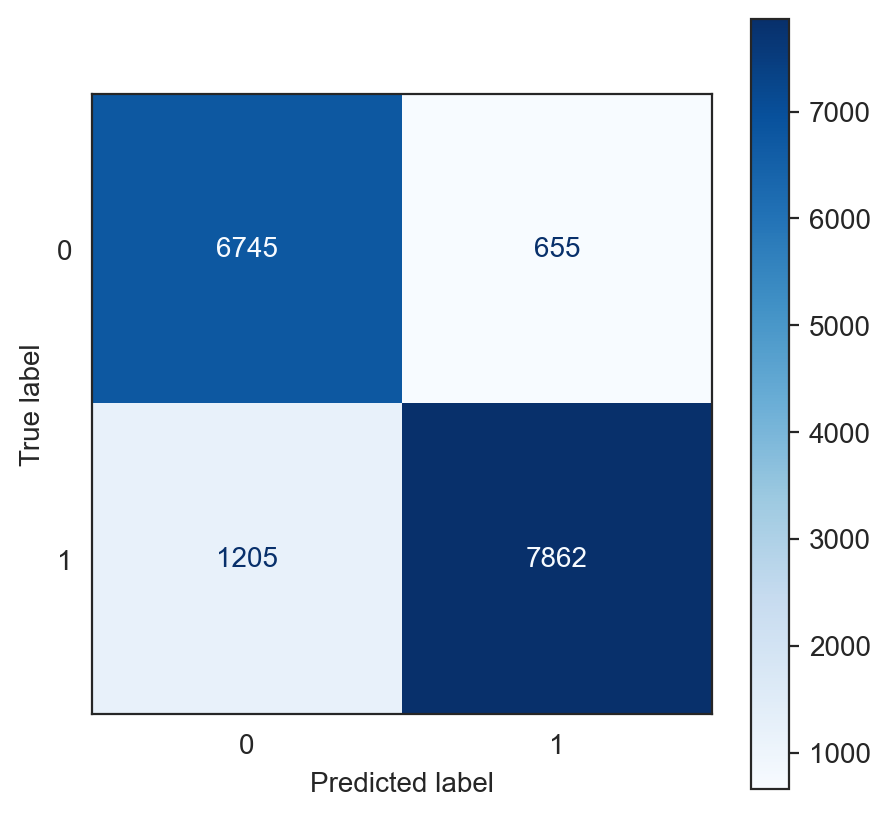

In [219]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()



In [220]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
import time
model_KNN = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

In [221]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) 
end_predict = time.time()
# 1  1 arttırarak ilerle test et
## ayrı tablo yap 1 den 10a olan değerlerle 
#ANN SVC Naive bayes Gaussian algoritmalarını da dene

Wall time: 12.6 s


In [222]:
accuracykNN = accuracy_score(y_test, y_predictions)
recallkNN = recall_score(y_test, y_predictions, average='weighted')
precisionkNN = precision_score(y_test, y_predictions, average='weighted')
f1skNN = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracykNN))
print("Recall: "+ "{:.2%}".format(recallkNN))
print("Precision: "+ "{:.2%}".format(precisionkNN))
print("F1-Score: "+ "{:.2%}".format(f1skNN))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracykNN, recallkNN, precisionkNN, f1skNN]

Accuracy: 92.25%
Recall: 92.25%
Precision: 92.73%
F1-Score: 92.27%
time to train: 0.01 s
time to predict: 12.60 s
total: 12.61 s


In [223]:
model_KNN.loc['K=2'] = [accuracykNN, recallkNN, precisionkNN, f1skNN]

In [224]:
model_KNN.style.background_gradient(cmap='bone').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score
K=2,92.25%,92.25%,92.73%,92.27%


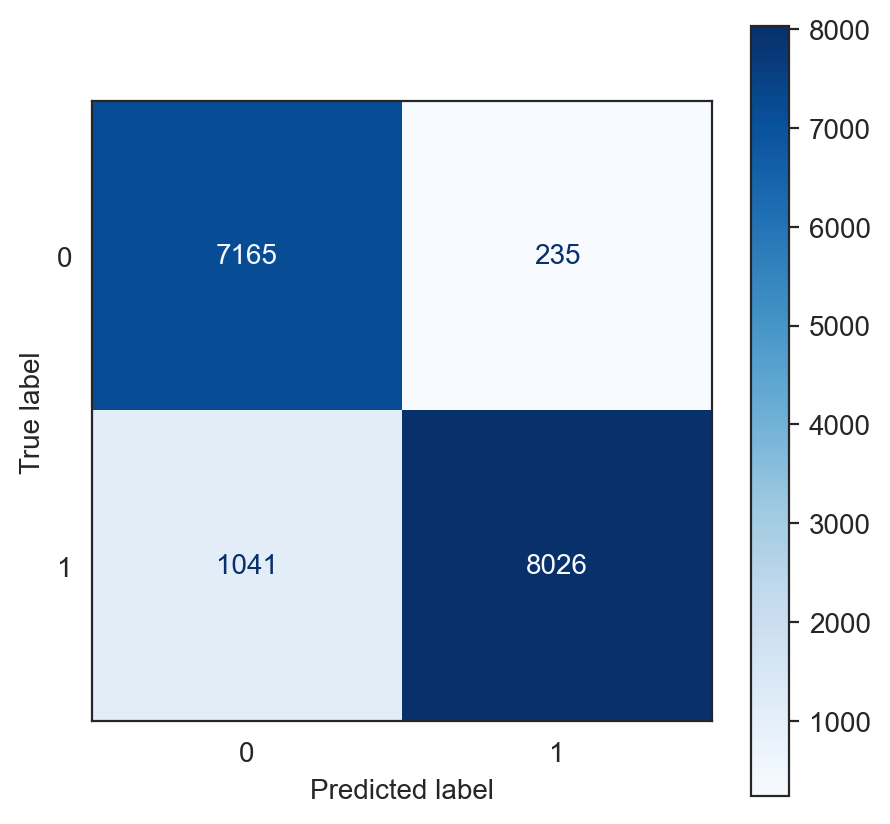

In [225]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()


In [226]:
%%time
#SVC
from sklearn.svm import SVC
start = time.time()
model = SVC(C=1.0, random_state=1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()
# 1  1 arttırarak ilerle test et
## ayrı tablo yap 1 den 10a olan değerlerle 
#ANN SVC Naive bayes Gaussian algoritmalarını da dene

Wall time: 1min 53s


In [227]:
accuracySVC = accuracy_score(y_test, y_predictions)
recallSVC = recall_score(y_test, y_predictions, average='weighted')
precisionSVC = precision_score(y_test, y_predictions, average='weighted')
f1sSVC = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracySVC))
print("Recall: "+ "{:.2%}".format(recallSVC))
print("Precision: "+ "{:.2%}".format(precisionSVC))
print("F1-Score: "+ "{:.2%}".format(f1sSVC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['SVC'] = [accuracySVC, recallSVC, precisionSVC, f1sSVC]

Accuracy: 91.47%
Recall: 91.47%
Precision: 92.03%
F1-Score: 91.49%
time to train: 90.80 s
time to predict: 22.72 s
total: 113.52 s


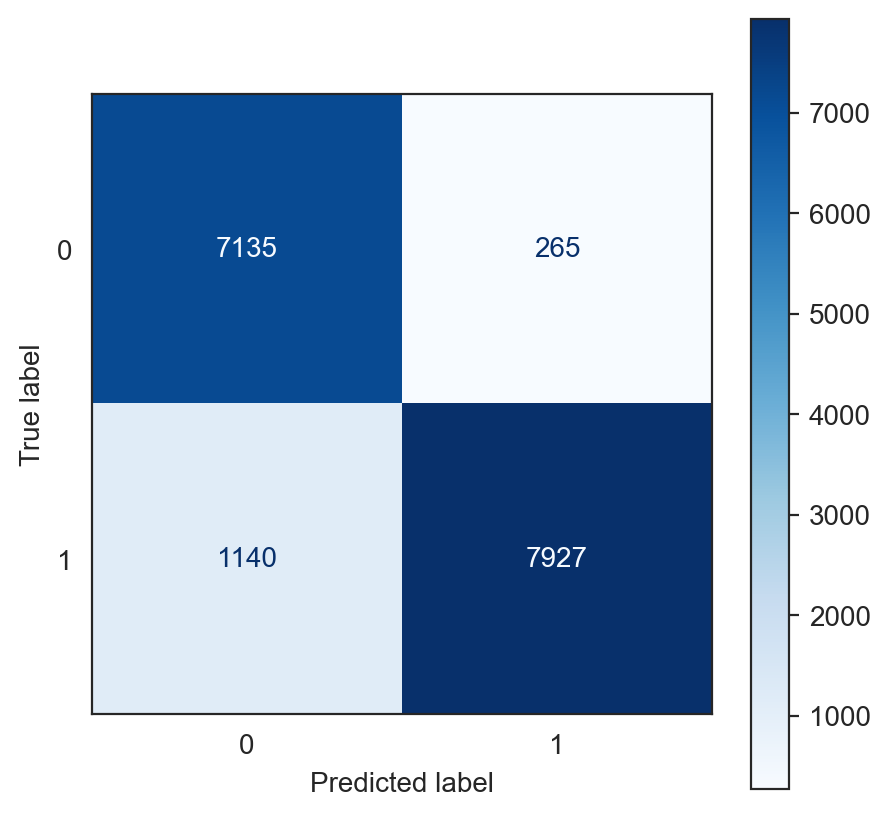

In [228]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()



# Logistic, KNN, SVC barchart

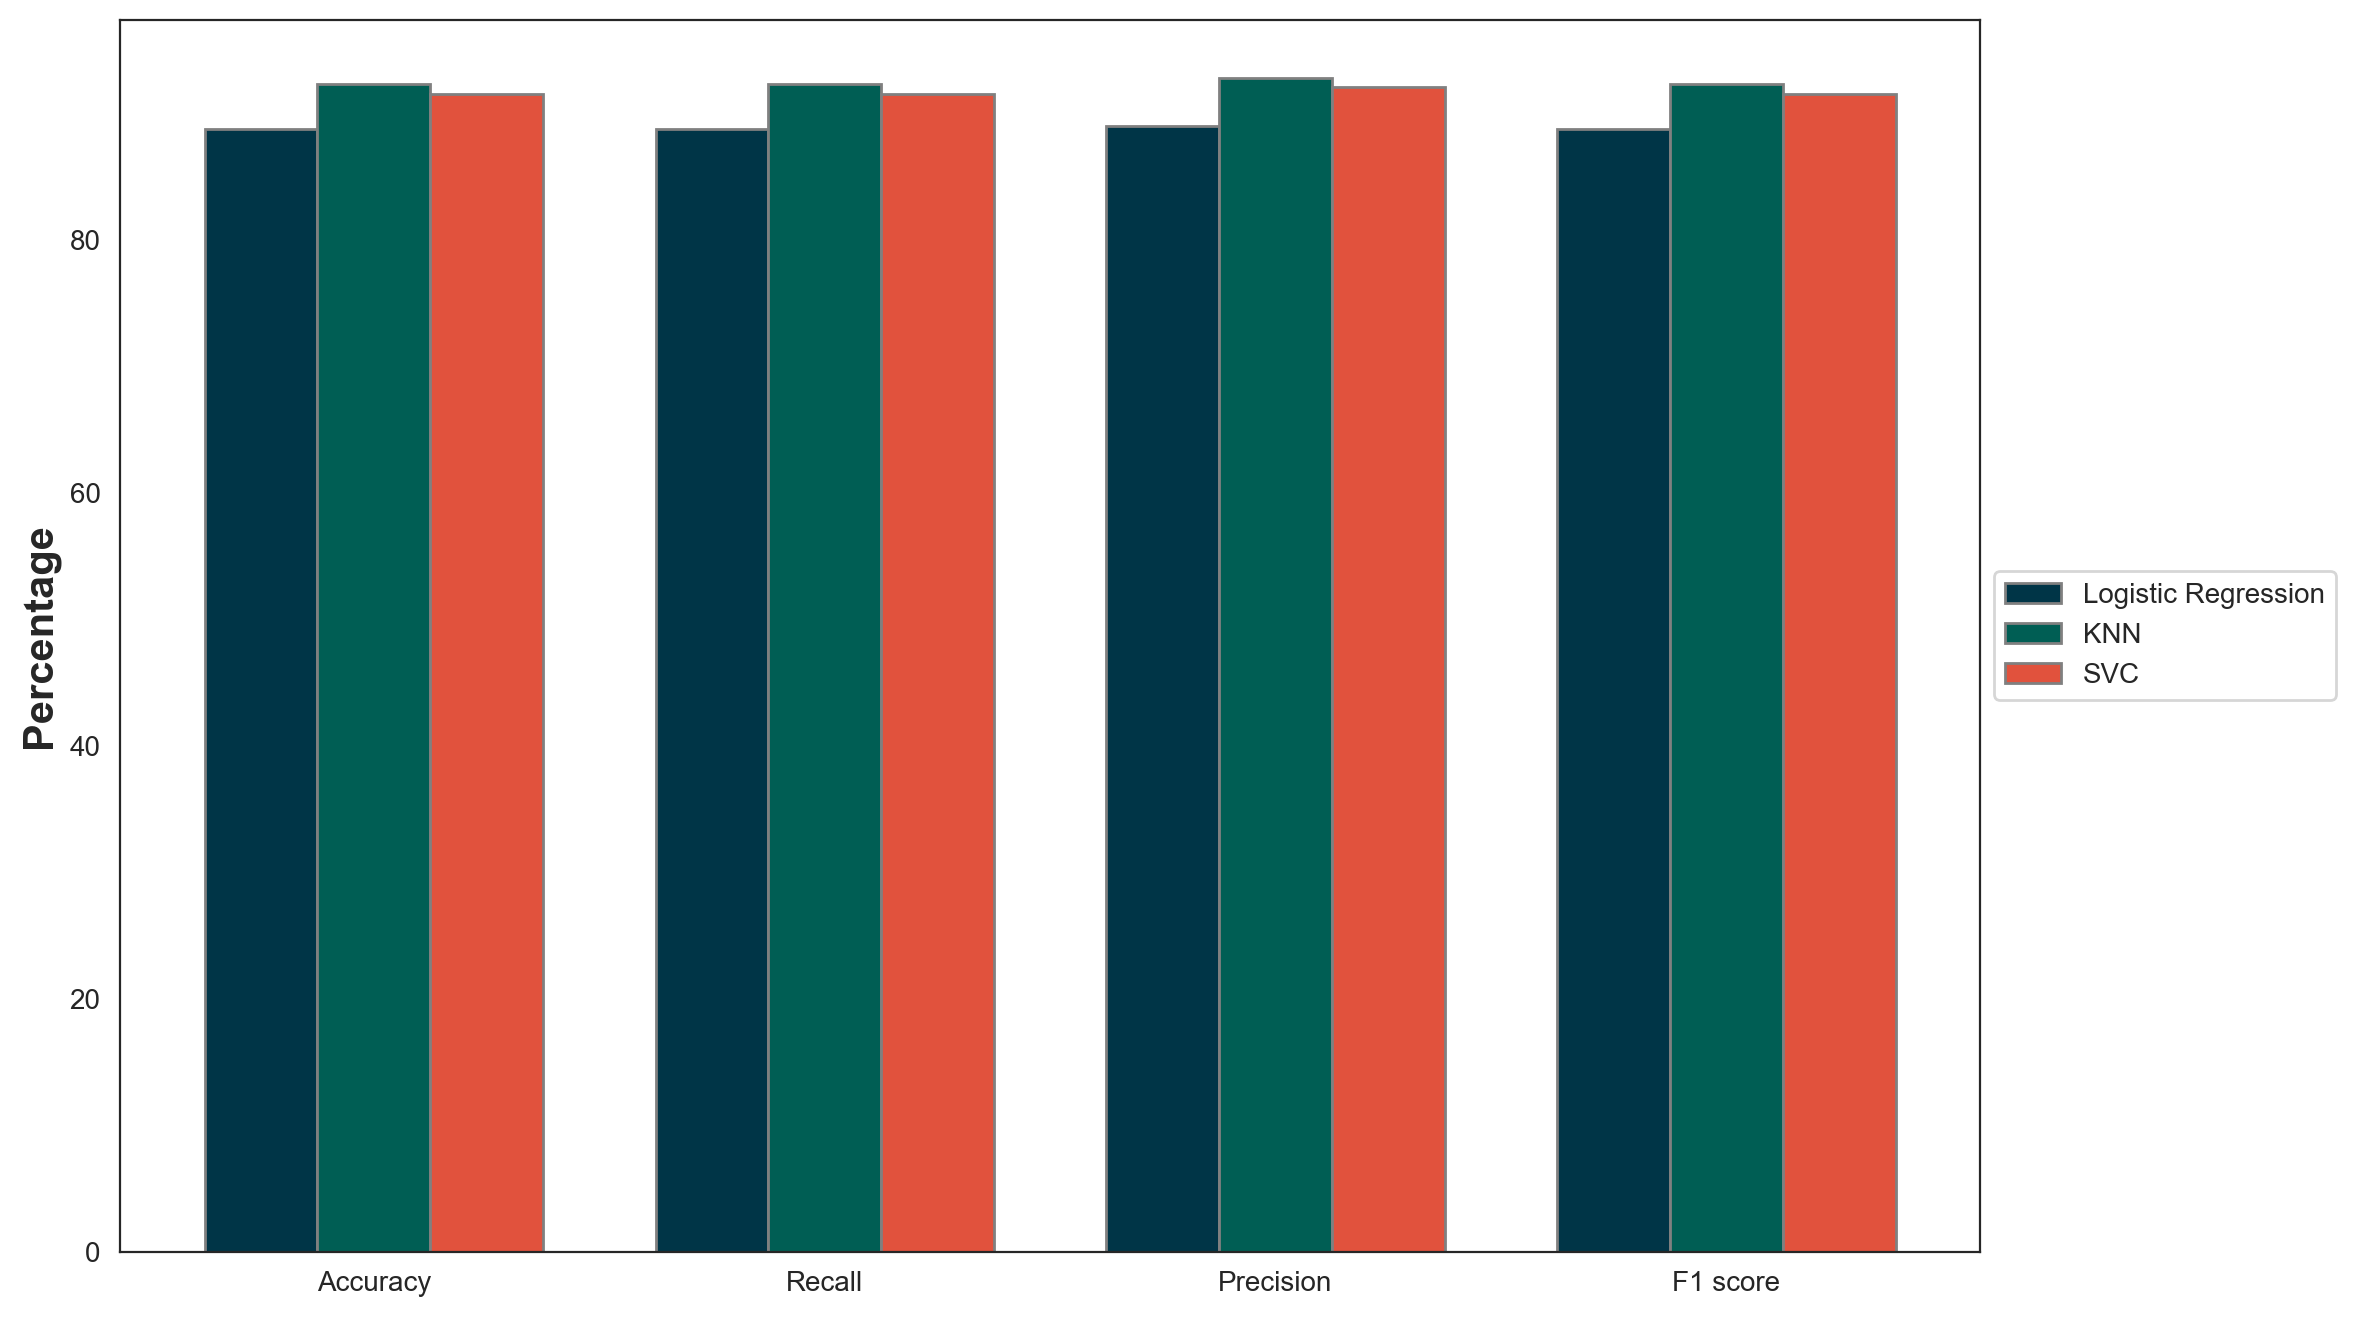

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = (accuracyLogistic*100, recallLogistic*100, precisionLogistic*100, f1sLogistic*100)
ECE = (accuracykNN*100, recallkNN*100, precisionkNN*100, f1skNN*100)
CSE = (accuracySVC*100, recallSVC*100, precisionSVC*100, f1sSVC*100)
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
bars1=plt.bar(br1, IT, color ='#003547', width = barWidth,
        edgecolor ='grey', label ='Logistic Regression')
bars2=plt.bar(br2, ECE, color ='#005E54', width = barWidth,
        edgecolor ='grey', label ='KNN')
bars3=plt.bar(br3, CSE, color ='#E1523D', width = barWidth,
        edgecolor ='grey', label ='SVC')
 
# Adding Xticks

plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Accuracy', 'Recall', 'Precision', 'F1 score'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [262]:
%%time
# Naive-Bayes
# Hybrid modelleri test et naive bayes ile tree kullanımı gibi bu tip modelleri test edip başarı oranını yükseltmeyi dene
# Naive-Bayes+ Decision Tree modeli ve benzerleri
# Algoritmaların toplu başarı oranını sağlama yöntemlerine bak denemeye çalış
from sklearn.naive_bayes import BernoulliNB
start = time.time()
model = BernoulliNB().fit(X_train,y_train) # GaussianNB BernoulliNB
end_train = time.time()
y_predictions = model.predict(X_test) 
end_predict = time.time()


Wall time: 49.1 ms


In [263]:
accuracyNB = accuracy_score(y_test, y_predictions)
recallNB = recall_score(y_test, y_predictions, average='weighted')
precisionNB = precision_score(y_test, y_predictions, average='weighted')
f1sNB = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracyNB))
print("Recall: "+ "{:.2%}".format(recallNB))
print("Precision: "+ "{:.2%}".format(precisionNB))
print("F1-Score: "+ "{:.2%}".format(f1sNB))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naivebayes'] = [accuracyNB, recallNB, precisionNB, f1sNB]

Accuracy: 71.40%
Recall: 71.40%
Precision: 72.72%
F1-Score: 71.42%
time to train: 0.04 s
time to predict: 0.01 s
total: 0.05 s


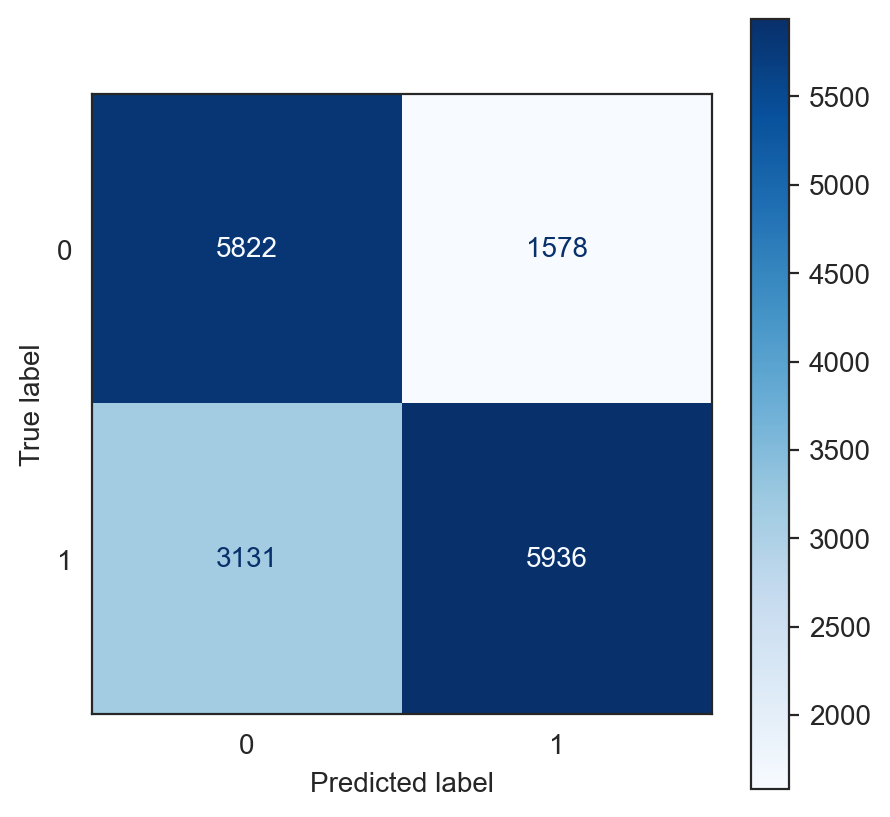

In [264]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()


In [233]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) 
end_predict = time.time()

Wall time: 673 ms


In [234]:
accuracyDT = accuracy_score(y_test, y_predictions)
recallDT = recall_score(y_test, y_predictions, average='weighted')
precisionDT = precision_score(y_test, y_predictions, average='weighted')
f1sDT = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracyDT))
print("Recall: "+ "{:.2%}".format(recallDT))
print("Precision: "+ "{:.2%}".format(precisionDT))
print("F1-Score: "+ "{:.2%}".format(f1sDT))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracyDT, recallDT, precisionDT, f1sDT]

Accuracy: 93.20%
Recall: 93.20%
Precision: 93.21%
F1-Score: 93.21%
time to train: 0.67 s
time to predict: 0.00 s
total: 0.67 s


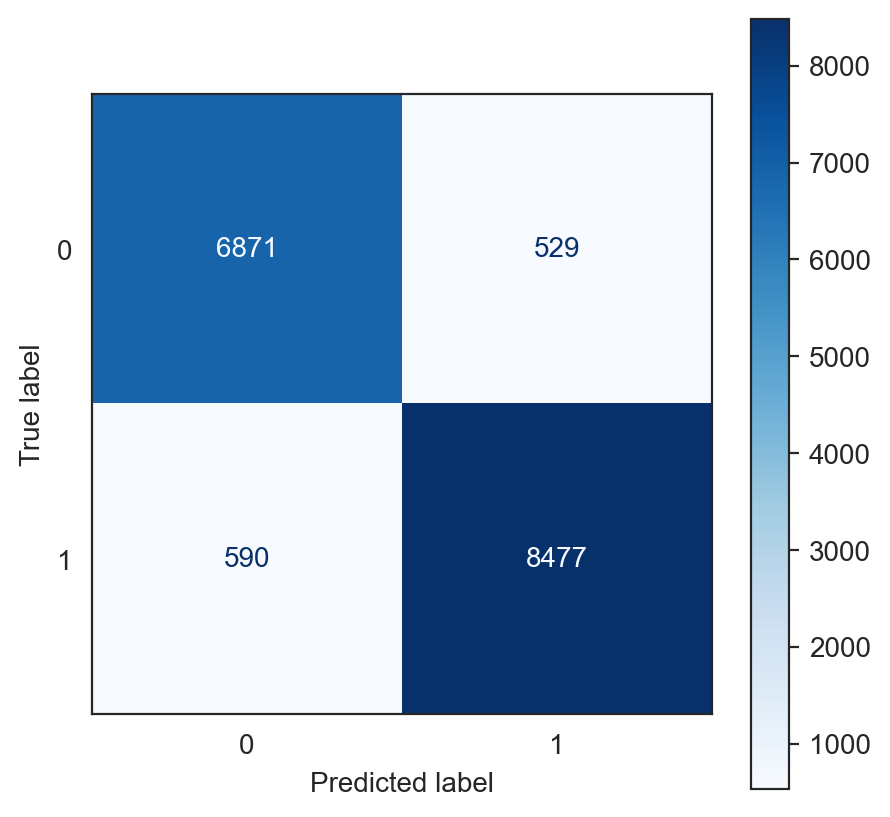

In [235]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()


In [236]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.57 s


In [237]:
accuracyET = accuracy_score(y_test, y_predictions)
recallET = recall_score(y_test, y_predictions, average='weighted')
precisionET = precision_score(y_test, y_predictions, average='weighted')
f1sET = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracyET))
print("Recall: "+ "{:.2%}".format(recallET))
print("Precision: "+ "{:.2%}".format(precisionET))
print("F1-Score: "+ "{:.2%}".format(f1sET))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracyET, recallET, precisionET, f1sET]

Accuracy: 94.20%
Recall: 94.20%
Precision: 94.30%
F1-Score: 94.21%
time to train: 1.49 s
time to predict: 0.08 s
total: 1.57 s


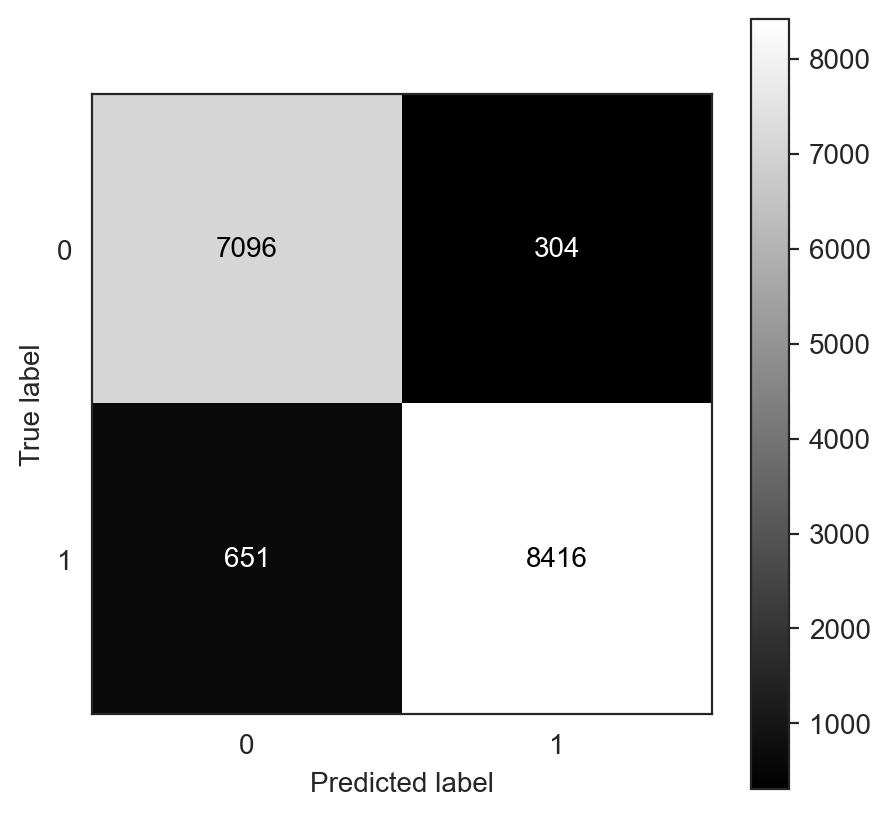

In [238]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap="gray",values_format = '')  
plt.show()


# NB,DT,ET BAR CHART

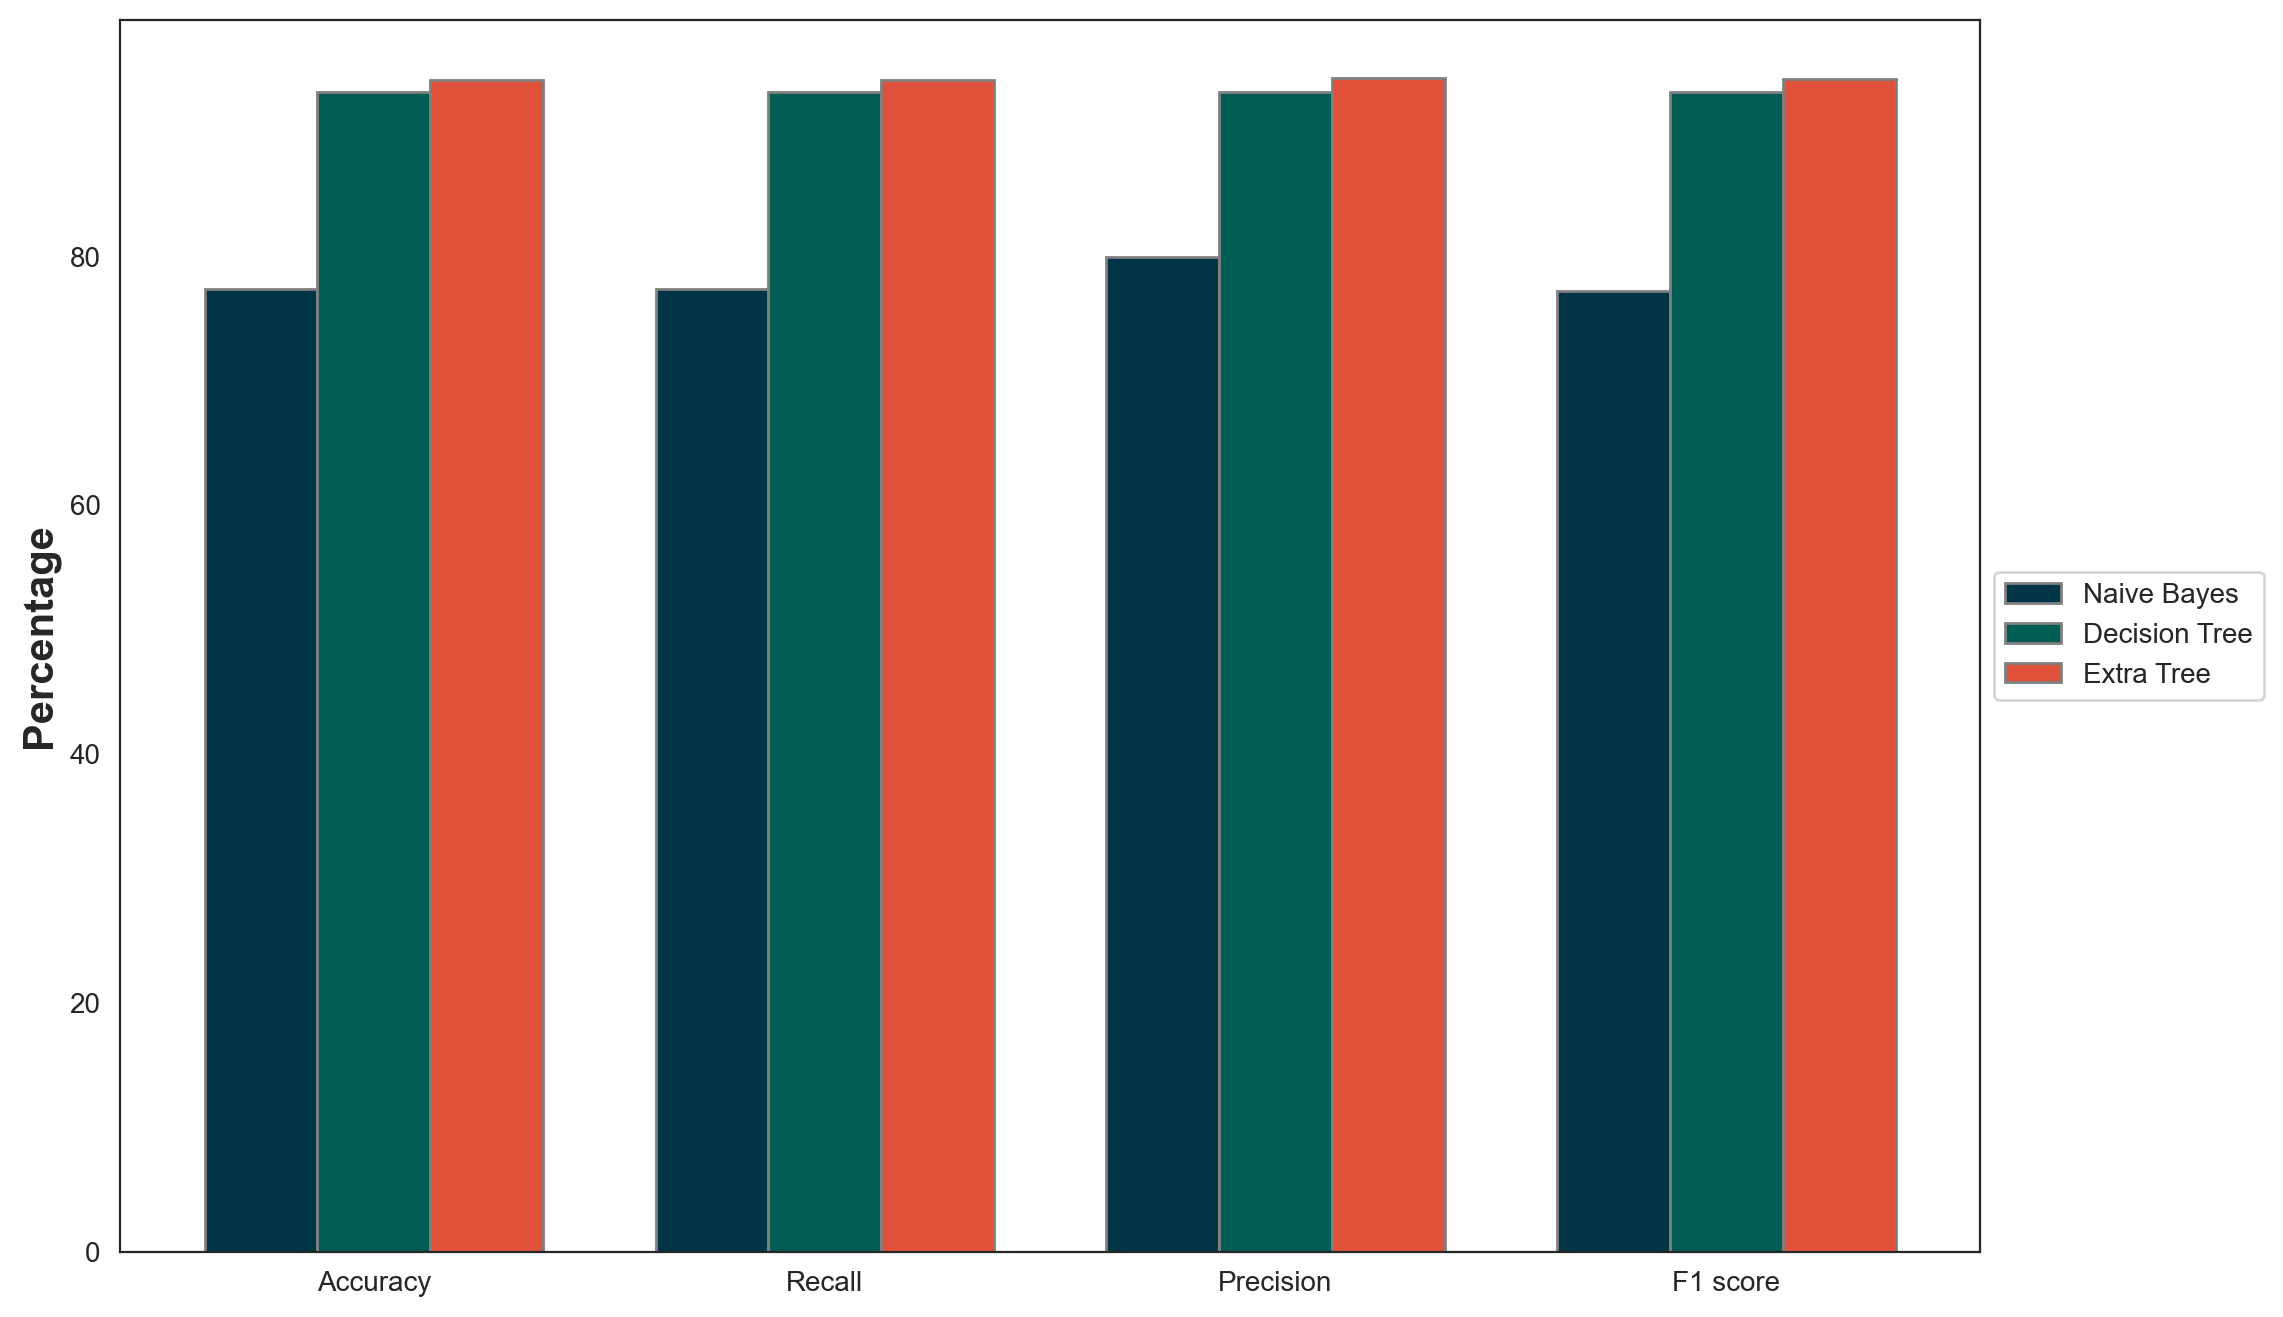

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = (accuracyNB*100, recallNB*100, precisionNB*100, f1sNB*100)
ECE = (accuracyDT*100, recallDT*100, precisionDT*100, f1sDT*100)
CSE = (accuracyET*100, recallET*100, precisionET*100, f1sET*100)
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


# Make the plot
bars1=plt.bar(br1, IT, color ='#003547', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
bars2=plt.bar(br2, ECE, color ='#005E54', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
bars3=plt.bar(br3, CSE, color ='#E1523D', width = barWidth,
        edgecolor ='grey', label ='Extra Tree')
 
# Adding Xticks

plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Accuracy', 'Recall', 'Precision', 'F1 score'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [240]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 2.74 s


In [241]:
accuracyRF = accuracy_score(y_test, y_predictions)
recallRF = recall_score(y_test, y_predictions, average='weighted')
precisionRF = precision_score(y_test, y_predictions, average='weighted')
f1sRF = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracyRF))
print("Recall: "+ "{:.2%}".format(recallRF))
print("Precision: "+ "{:.2%}".format(precisionRF))
print("F1-Score: "+ "{:.2%}".format(f1sRF))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracyRF, recallRF, precisionRF, f1sRF]

Accuracy: 94.29%
Recall: 94.29%
Precision: 94.38%
F1-Score: 94.30%
time to train: 2.67 s
time to predict: 0.08 s
total: 2.74 s


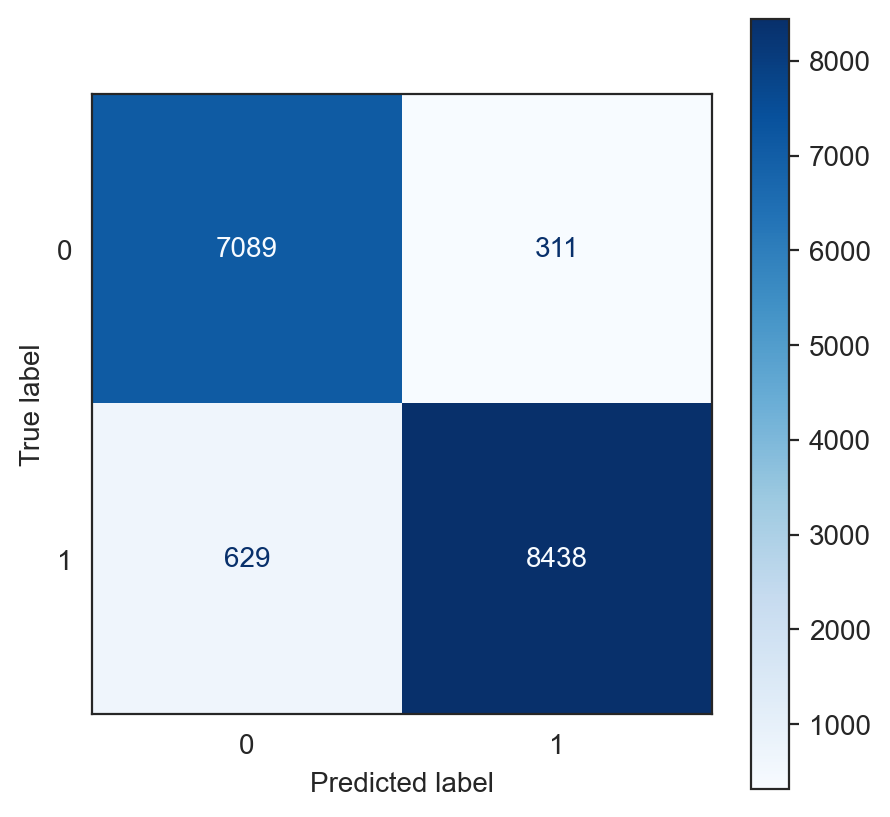

In [242]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()


In [243]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 17.5 s


In [244]:
accuracyGB = accuracy_score(y_test, y_predictions)
recallGB = recall_score(y_test, y_predictions, average='weighted')
precisionGB = precision_score(y_test, y_predictions, average='weighted')
f1sGB = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracyGB))
print("Recall: "+ "{:.2%}".format(recallGB))
print("Precision: "+ "{:.2%}".format(precisionGB))
print("F1-Score: "+ "{:.2%}".format(f1sGB))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracyGB, recallGB, precisionGB, f1sGB]

Accuracy: 92.88%
Recall: 92.88%
Precision: 93.03%
F1-Score: 92.89%
time to train: 17.43 s
time to predict: 0.03 s
total: 17.46 s


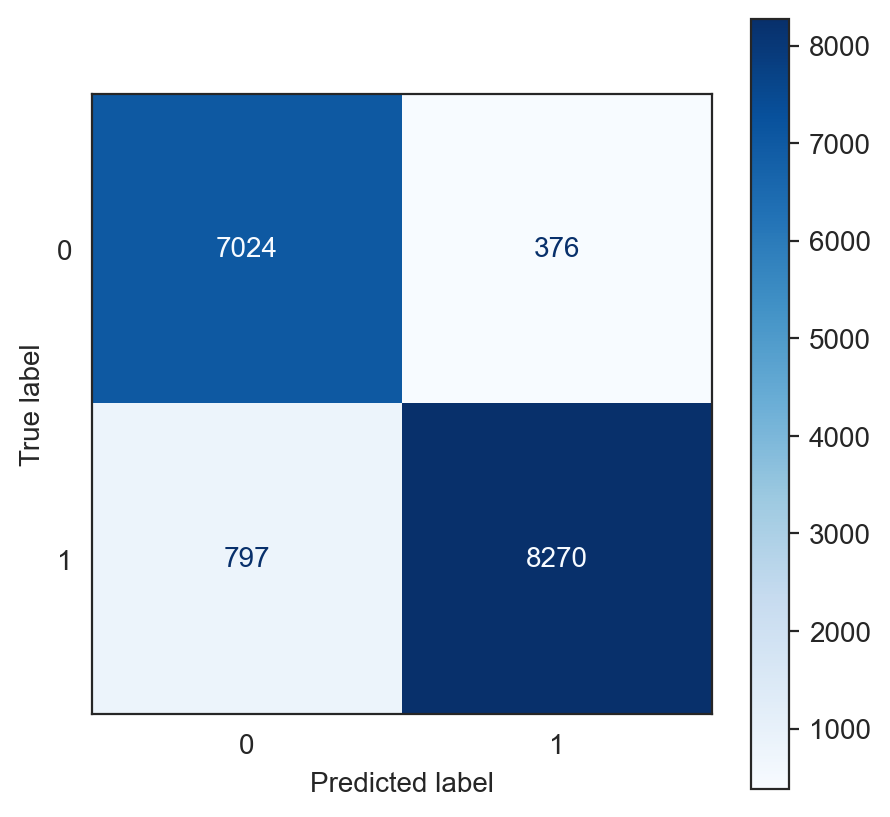

In [245]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()


In [246]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 16.2 s


In [247]:
accuracyMLP = accuracy_score(y_test, y_predictions)
recallMLP = recall_score(y_test, y_predictions, average='weighted')
precisionMLP = precision_score(y_test, y_predictions, average='weighted')
f1sMLP = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracyMLP))
print("Recall: "+ "{:.2%}".format(recallMLP))
print("Precision: "+ "{:.2%}".format(precisionMLP))
print("F1-Score: "+ "{:.2%}".format(f1sMLP))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['MLP'] = [accuracyMLP, recallMLP, precisionMLP, f1sMLP]

Accuracy: 91.84%
Recall: 91.84%
Precision: 92.05%
F1-Score: 91.86%
time to train: 16.17 s
time to predict: 0.01 s
total: 16.18 s


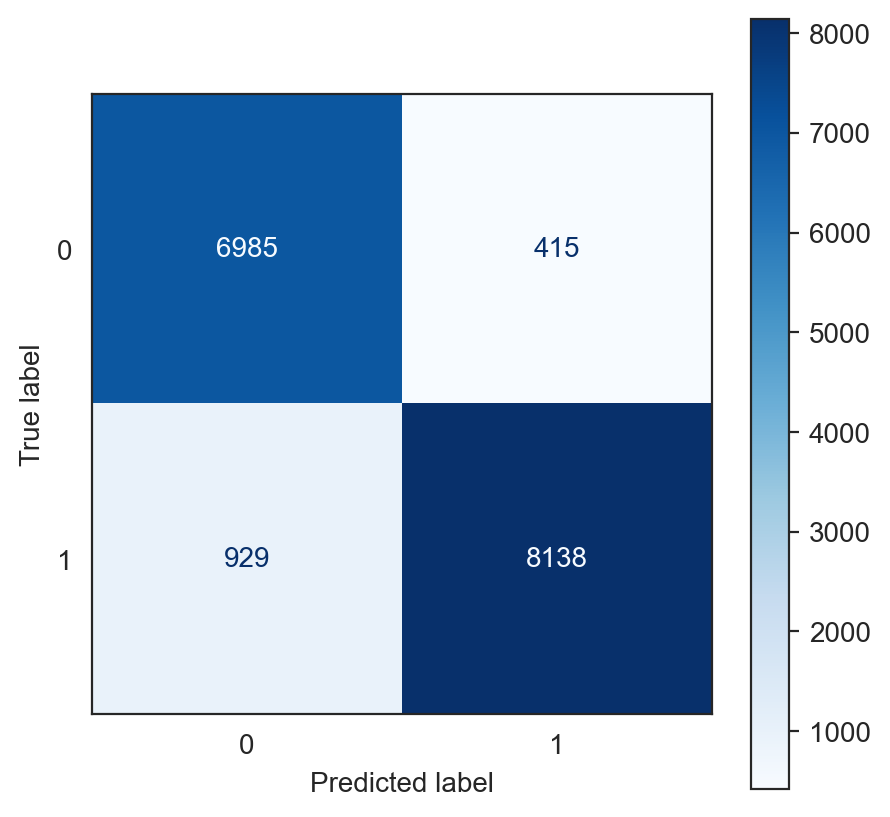

In [248]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format = '')  
plt.show()


# RF,GB,MLP BAR CHART

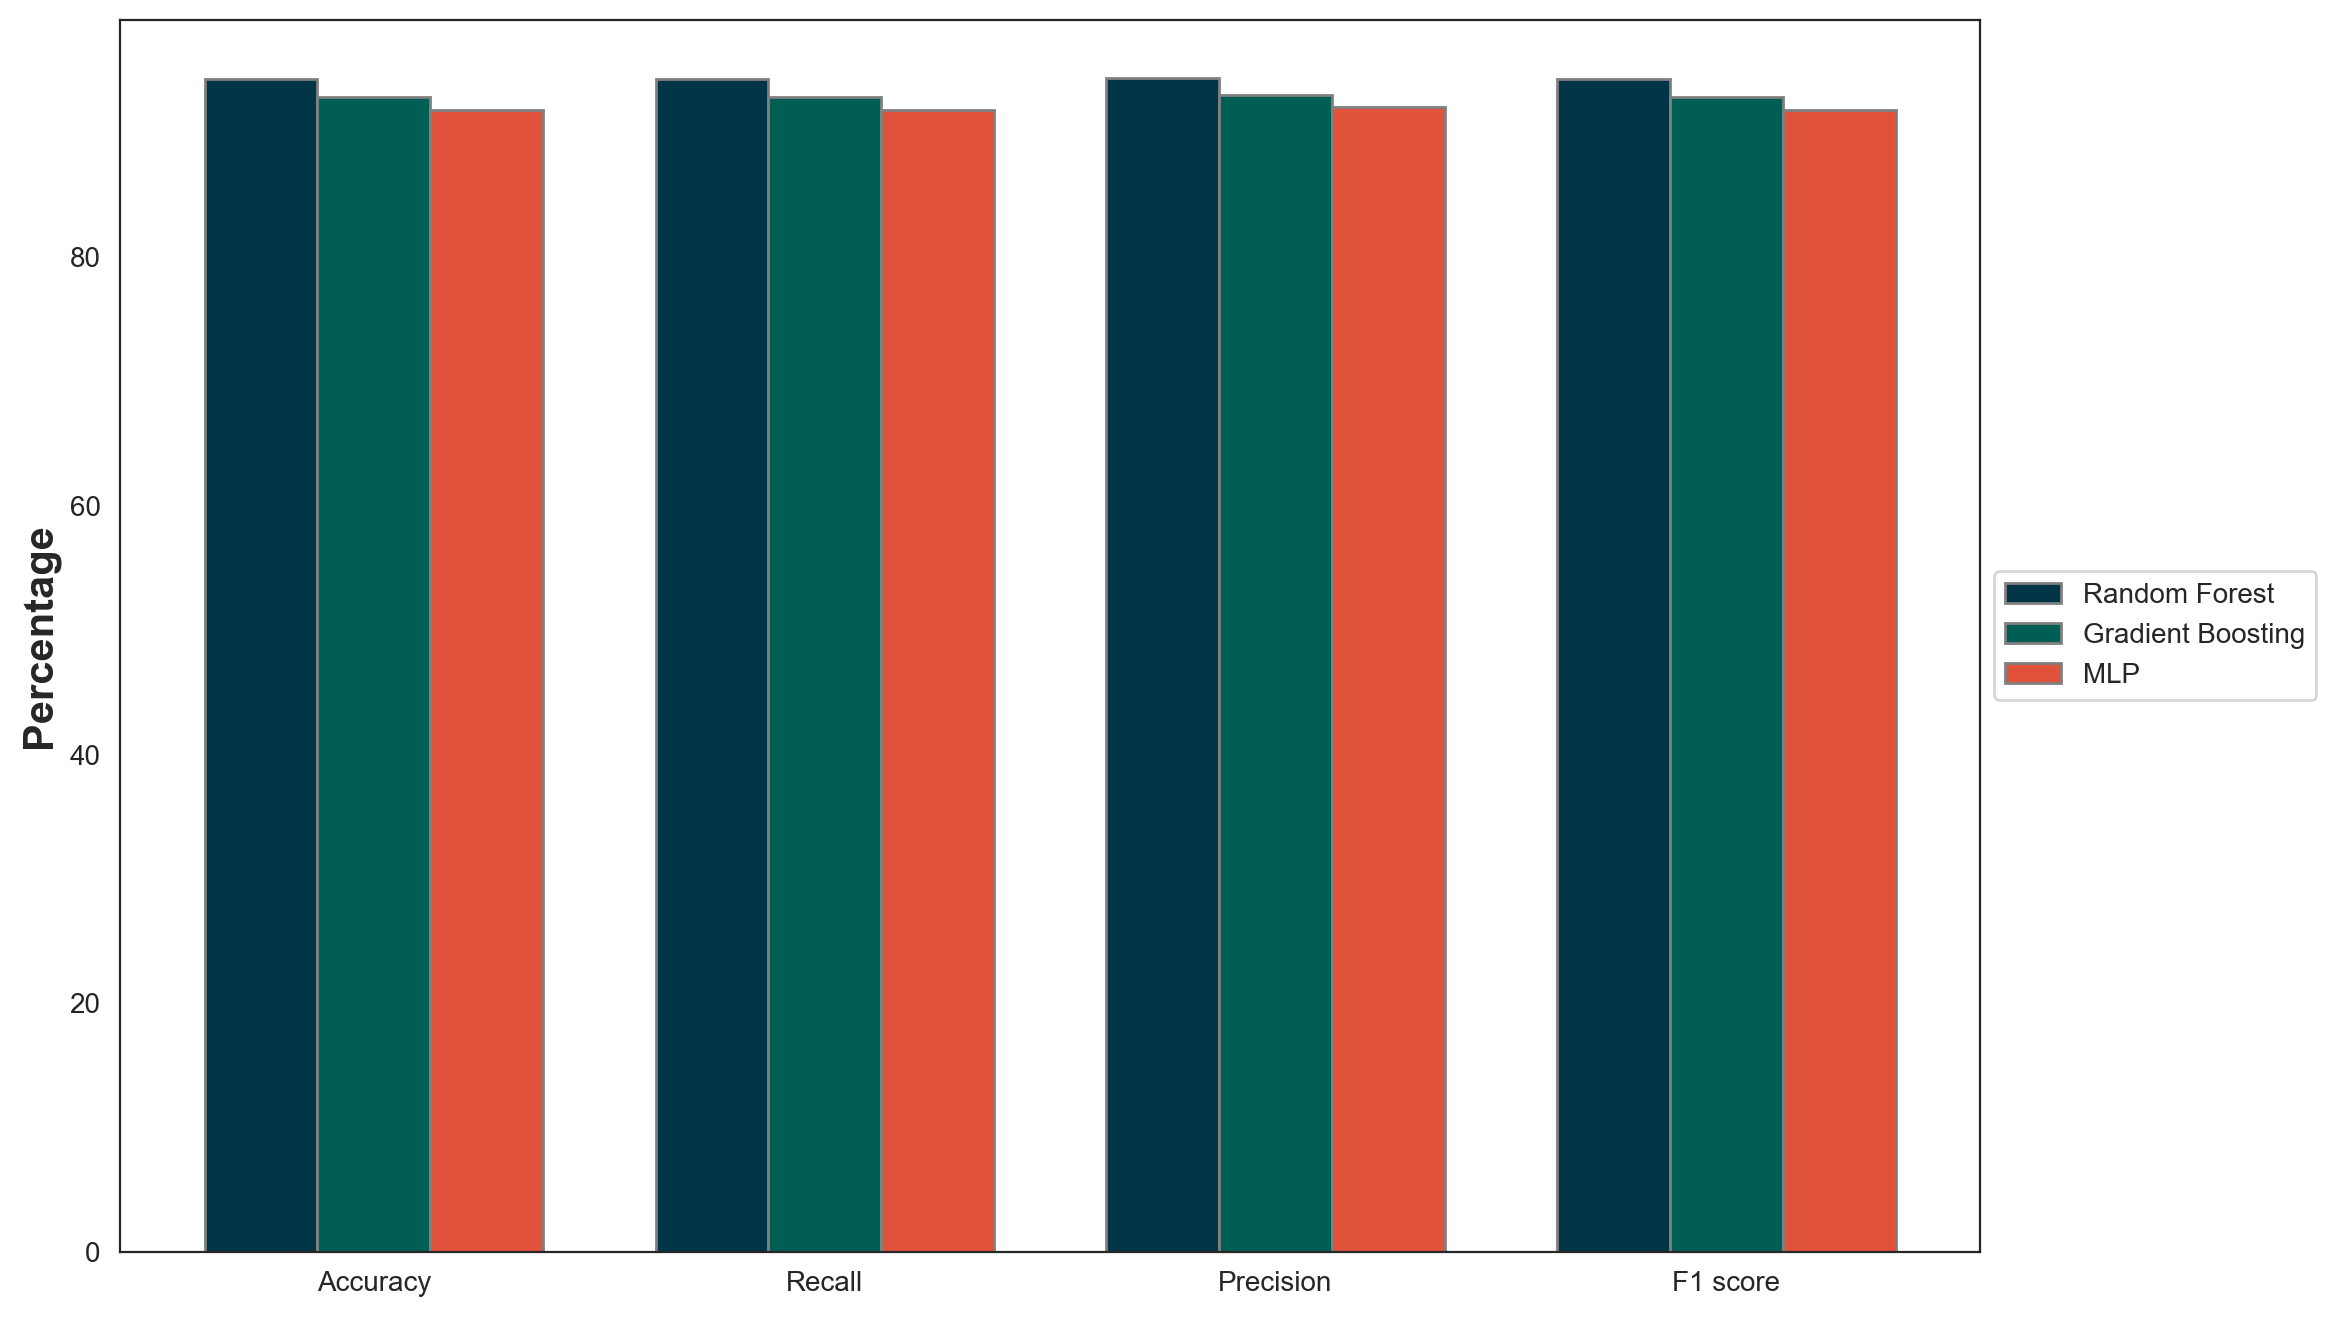

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = (accuracyRF*100, recallRF*100, precisionRF*100, f1sRF*100)
ECE = (accuracyGB*100, recallGB*100, precisionGB*100, f1sGB*100)
CSE = (accuracyMLP*100, recallMLP*100, precisionMLP*100, f1sMLP*100)
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
bars1=plt.bar(br1, IT, color ='#003547', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
bars2=plt.bar(br2, ECE, color ='#005E54', width = barWidth,
        edgecolor ='grey', label ='Gradient Boosting')
bars3=plt.bar(br3, CSE, color ='#E1523D', width = barWidth,
        edgecolor ='grey', label ='MLP')
 
# Adding Xticks

plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Accuracy', 'Recall', 'Precision', 'F1 score'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [250]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score
Logistic,88.70%,88.70%,88.95%,88.73%
kNN,92.25%,92.25%,92.73%,92.27%
SVC,91.47%,91.47%,92.03%,91.49%
Naivebayes,77.33%,77.33%,79.97%,77.23%
Decision Tree,93.20%,93.20%,93.21%,93.21%
Extra Trees,94.20%,94.20%,94.30%,94.21%
Random Forest,94.29%,94.29%,94.38%,94.30%
Gradient Boosting Classifier,92.88%,92.88%,93.03%,92.89%
MLP,91.84%,91.84%,92.05%,91.86%


In [251]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
!pip install keras-metrics
import keras_metrics as km 
import keras
import numpy as np
from numpy import array

In [252]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [253]:

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=40, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model


model = build_model()


start = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

Epoch 1/200
33/33 - 1s - loss: 2.6508 - accuracy: 0.4470 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - 731ms/epoch - 22ms/step
Epoch 2/200
33/33 - 0s - loss: 1.6428 - accuracy: 0.7580 - f1_m: 0.0719 - precision_m: 0.1372 - recall_m: 0.0506 - 78ms/epoch - 2ms/step
Epoch 3/200
33/33 - 0s - loss: 0.7133 - accuracy: 0.7482 - f1_m: 0.5962 - precision_m: 0.5394 - recall_m: 0.6925 - 76ms/epoch - 2ms/step
Epoch 4/200
33/33 - 0s - loss: 0.4889 - accuracy: 0.7643 - f1_m: 0.6963 - precision_m: 0.5460 - recall_m: 0.9610 - 79ms/epoch - 2ms/step
Epoch 5/200
33/33 - 0s - loss: 0.4254 - accuracy: 0.7819 - f1_m: 0.7007 - precision_m: 0.5481 - recall_m: 0.9712 - 77ms/epoch - 2ms/step
Epoch 6/200
33/33 - 0s - loss: 0.3881 - accuracy: 0.8151 - f1_m: 0.7034 - precision_m: 0.5498 - recall_m: 0.9767 - 83ms/epoch - 3ms/step
Epoch 7/200
33/33 - 0s - loss: 0.3626 - accuracy: 0.8286 - f1_m: 0.7074 - precision_m: 0.5517 - recall_m: 0.9860 - 81ms/epoch - 2ms/step
Epoch 8/200
33/33 - 0s - lo

Epoch 61/200
33/33 - 0s - loss: 0.1831 - accuracy: 0.9117 - f1_m: 0.7100 - precision_m: 0.5505 - recall_m: 0.9999 - 76ms/epoch - 2ms/step
Epoch 62/200
33/33 - 0s - loss: 0.1829 - accuracy: 0.9121 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 76ms/epoch - 2ms/step
Epoch 63/200
33/33 - 0s - loss: 0.1824 - accuracy: 0.9124 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 81ms/epoch - 2ms/step
Epoch 64/200
33/33 - 0s - loss: 0.1823 - accuracy: 0.9122 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 81ms/epoch - 2ms/step
Epoch 65/200
33/33 - 0s - loss: 0.1826 - accuracy: 0.9126 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 84ms/epoch - 3ms/step
Epoch 66/200
33/33 - 0s - loss: 0.1819 - accuracy: 0.9125 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 79ms/epoch - 2ms/step
Epoch 67/200
33/33 - 0s - loss: 0.1820 - accuracy: 0.9126 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 81ms/epoch - 2ms/step
Epoch 68/200
33/33 - 0s - loss: 0.

Epoch 121/200
33/33 - 0s - loss: 0.1772 - accuracy: 0.9153 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 89ms/epoch - 3ms/step
Epoch 122/200
33/33 - 0s - loss: 0.1759 - accuracy: 0.9152 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 88ms/epoch - 3ms/step
Epoch 123/200
33/33 - 0s - loss: 0.1763 - accuracy: 0.9153 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 124/200
33/33 - 0s - loss: 0.1762 - accuracy: 0.9152 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 97ms/epoch - 3ms/step
Epoch 125/200
33/33 - 0s - loss: 0.1758 - accuracy: 0.9156 - f1_m: 0.7101 - precision_m: 0.5505 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 126/200
33/33 - 0s - loss: 0.1759 - accuracy: 0.9157 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 127/200
33/33 - 0s - loss: 0.1753 - accuracy: 0.9157 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 101ms/epoch - 3ms/step
Epoch 128/200
33/33 - 0s -

Epoch 180/200
33/33 - 0s - loss: 0.1721 - accuracy: 0.9177 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 81ms/epoch - 2ms/step
Epoch 181/200
33/33 - 0s - loss: 0.1727 - accuracy: 0.9173 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 81ms/epoch - 2ms/step
Epoch 182/200
33/33 - 0s - loss: 0.1722 - accuracy: 0.9177 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 78ms/epoch - 2ms/step
Epoch 183/200
33/33 - 0s - loss: 0.1723 - accuracy: 0.9177 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 80ms/epoch - 2ms/step
Epoch 184/200
33/33 - 0s - loss: 0.1721 - accuracy: 0.9174 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 77ms/epoch - 2ms/step
Epoch 185/200
33/33 - 0s - loss: 0.1724 - accuracy: 0.9173 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 77ms/epoch - 2ms/step
Epoch 186/200
33/33 - 0s - loss: 0.1728 - accuracy: 0.9177 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 85ms/epoch - 3ms/step
Epoch 187/200
33/33 - 0s - 

In [254]:

loss, accuracyMLPK, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()
model_performance.loc['MLP (Keras)'] = [accuracyMLPK, accuracyMLPK, accuracyMLPK, accuracyMLPK]

515/515 [==============================] - 1s 814us/step - loss: 0.1737 - accuracy: 0.9154 - f1_m: 0.7058 - precision_m: 0.5506 - recall_m: 1.0000


In [255]:

def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True,input_shape=(1,40)))
    model.add(GRU(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model


X_train_array = array(X_train) 
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,40)


X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,40) 



model = build_model()

start = time.time()

model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

65865
Epoch 1/200
33/33 - 4s - loss: 2.1186 - accuracy: 0.5441 - 4s/epoch - 110ms/step
Epoch 2/200
33/33 - 0s - loss: 1.5329 - accuracy: 0.6982 - 256ms/epoch - 8ms/step
Epoch 3/200
33/33 - 0s - loss: 0.8621 - accuracy: 0.7024 - 261ms/epoch - 8ms/step
Epoch 4/200
33/33 - 0s - loss: 0.6006 - accuracy: 0.7412 - 254ms/epoch - 8ms/step
Epoch 5/200
33/33 - 0s - loss: 0.5063 - accuracy: 0.7541 - 249ms/epoch - 8ms/step
Epoch 6/200
33/33 - 0s - loss: 0.4425 - accuracy: 0.7774 - 251ms/epoch - 8ms/step
Epoch 7/200
33/33 - 0s - loss: 0.3948 - accuracy: 0.7970 - 258ms/epoch - 8ms/step
Epoch 8/200
33/33 - 0s - loss: 0.3597 - accuracy: 0.8093 - 250ms/epoch - 8ms/step
Epoch 9/200
33/33 - 0s - loss: 0.3304 - accuracy: 0.8222 - 260ms/epoch - 8ms/step
Epoch 10/200
33/33 - 0s - loss: 0.3062 - accuracy: 0.8443 - 281ms/epoch - 9ms/step
Epoch 11/200
33/33 - 0s - loss: 0.2860 - accuracy: 0.8637 - 277ms/epoch - 8ms/step
Epoch 12/200
33/33 - 0s - loss: 0.2689 - accuracy: 0.8767 - 237ms/epoch - 7ms/step
Epoch 13

Epoch 100/200
33/33 - 0s - loss: 0.1688 - accuracy: 0.9173 - 247ms/epoch - 7ms/step
Epoch 101/200
33/33 - 0s - loss: 0.1697 - accuracy: 0.9170 - 246ms/epoch - 7ms/step
Epoch 102/200
33/33 - 0s - loss: 0.1689 - accuracy: 0.9176 - 247ms/epoch - 7ms/step
Epoch 103/200
33/33 - 0s - loss: 0.1695 - accuracy: 0.9171 - 233ms/epoch - 7ms/step
Epoch 104/200
33/33 - 0s - loss: 0.1688 - accuracy: 0.9173 - 225ms/epoch - 7ms/step
Epoch 105/200
33/33 - 0s - loss: 0.1689 - accuracy: 0.9175 - 222ms/epoch - 7ms/step
Epoch 106/200
33/33 - 0s - loss: 0.1690 - accuracy: 0.9178 - 228ms/epoch - 7ms/step
Epoch 107/200
33/33 - 0s - loss: 0.1684 - accuracy: 0.9175 - 228ms/epoch - 7ms/step
Epoch 108/200
33/33 - 0s - loss: 0.1683 - accuracy: 0.9179 - 231ms/epoch - 7ms/step
Epoch 109/200
33/33 - 0s - loss: 0.1684 - accuracy: 0.9176 - 244ms/epoch - 7ms/step
Epoch 110/200
33/33 - 0s - loss: 0.1683 - accuracy: 0.9174 - 232ms/epoch - 7ms/step
Epoch 111/200
33/33 - 0s - loss: 0.1686 - accuracy: 0.9178 - 237ms/epoch - 7

Epoch 198/200
33/33 - 0s - loss: 0.1633 - accuracy: 0.9206 - 234ms/epoch - 7ms/step
Epoch 199/200
33/33 - 0s - loss: 0.1634 - accuracy: 0.9199 - 243ms/epoch - 7ms/step
Epoch 200/200
33/33 - 0s - loss: 0.1638 - accuracy: 0.9207 - 234ms/epoch - 7ms/step


In [256]:
loss, accuracyGRU = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['GRU (Keras)'] = [accuracyGRU, accuracyGRU, accuracyGRU, accuracyGRU]

515/515 [==============================] - 1s 1ms/step - loss: 0.1629 - accuracy: 0.9200


In [257]:
np.shape(X)

(82332, 40)

In [258]:
def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True,input_shape=(1,40)))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) 
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  
                  metrics=['accuracy']
                 )
    return model


X_train_array = array(X_train) 
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,40)


X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,40) 



model = build_model()



start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=3)
end_train = time.time()

65865
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Ep

In [259]:

loss, accuracyLSTM = model.evaluate(X_test_reshaped, y_test)

end_predict = time.time()
model_performance.loc['LSTM (Keras)'] = [accuracyLSTM, accuracyLSTM, accuracyLSTM, accuracyLSTM]

515/515 [==============================] - 1s 1ms/step - loss: 0.1649 - accuracy: 0.9186


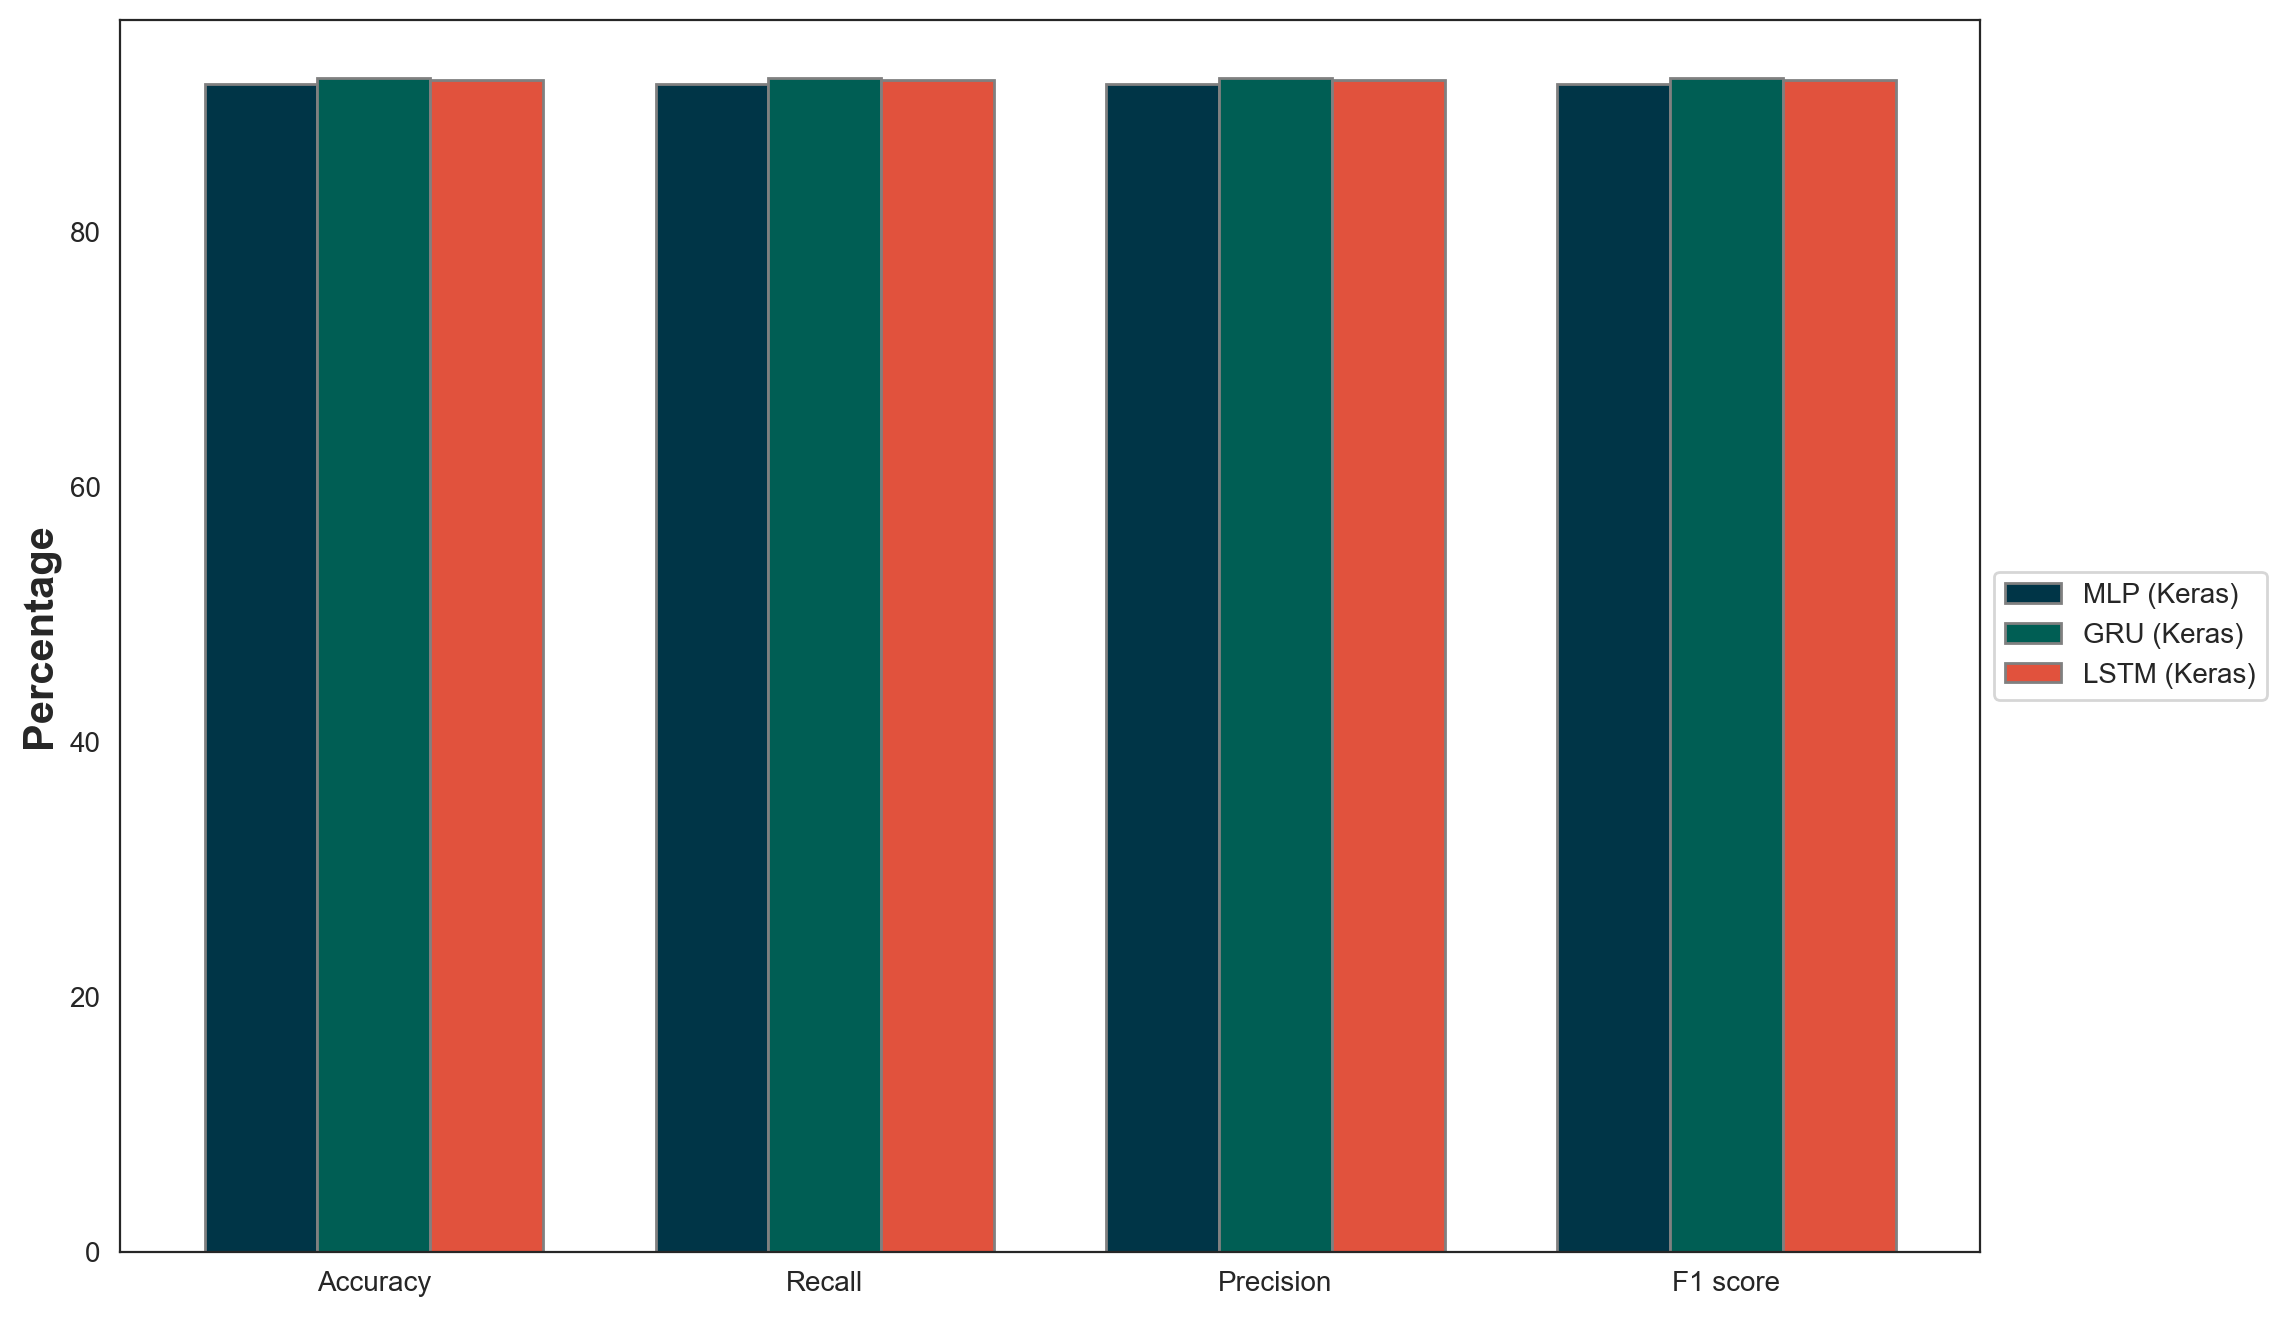

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))


IT = (accuracyMLPK*100, accuracyMLPK*100, accuracyMLPK*100, accuracyMLPK*100)
ECE = (accuracyGRU*100, accuracyGRU*100, accuracyGRU*100, accuracyGRU*100)
CSE = (accuracyLSTM*100, accuracyLSTM*100, accuracyLSTM*100, accuracyLSTM*100)
 

br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

bars1=plt.bar(br1, IT, color ='#003547', width = barWidth,
        edgecolor ='grey', label ='MLP (Keras)')
bars2=plt.bar(br2, ECE, color ='#005E54', width = barWidth,
        edgecolor ='grey', label ='GRU (Keras)')
bars3=plt.bar(br3, CSE, color ='#E1523D', width = barWidth,
        edgecolor ='grey', label ='LSTM (Keras)')
 


plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Accuracy', 'Recall', 'Precision', 'F1 score'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [261]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score
Logistic,88.70%,88.70%,88.95%,88.73%
kNN,92.25%,92.25%,92.73%,92.27%
SVC,91.47%,91.47%,92.03%,91.49%
Naivebayes,77.33%,77.33%,79.97%,77.23%
Decision Tree,93.20%,93.20%,93.21%,93.21%
Extra Trees,94.20%,94.20%,94.30%,94.21%
Random Forest,94.29%,94.29%,94.38%,94.30%
Gradient Boosting Classifier,92.88%,92.88%,93.03%,92.89%
MLP,91.84%,91.84%,92.05%,91.86%
MLP (Keras),91.54%,91.54%,91.54%,91.54%


In [83]:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

["'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!' is not recognized as an internal or external command,",
 'operable program or batch file.']

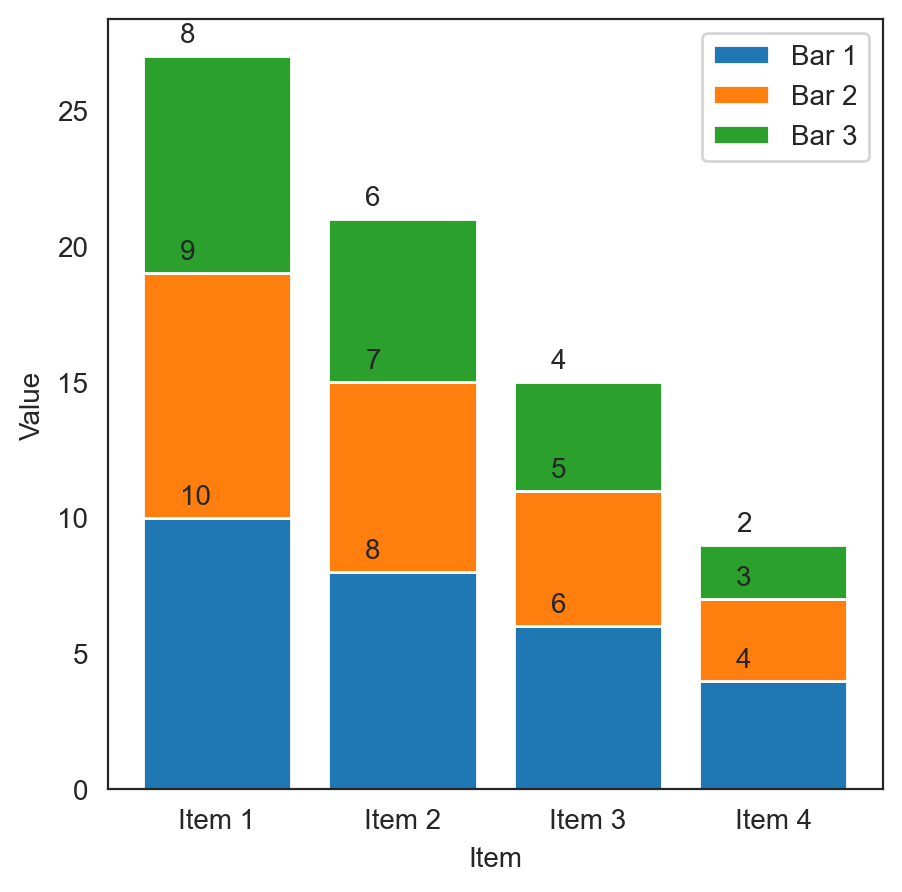

In [84]:
import matplotlib.pyplot as plt

# Data for the bar chart
items = ['Item 1', 'Item 2', 'Item 3', 'Item 4']
bar_1_values = [10, 8, 6, 4]
bar_2_values = [9, 7, 5, 3]
bar_3_values = [8, 6, 4, 2]

# Create the bar chart
fig, ax = plt.subplots()

# Add the bars for each item
ax.bar(items, bar_1_values, label='Bar 1')
ax.bar(items, bar_2_values, bottom=bar_1_values, label='Bar 2')
ax.bar(items, bar_3_values, bottom=[a + b for a, b in zip(bar_1_values, bar_2_values)], label='Bar 3')

# Add the values on top of the bars
for i, v in enumerate(bar_1_values):
    ax.text(i - 0.2, v + 0.5, str(v))
for i, v in enumerate(bar_2_values):
    ax.text(i - 0.2, v + bar_1_values[i] + 0.5, str(v))
for i, v in enumerate(bar_3_values):
    ax.text(i - 0.2, v + bar_1_values[i] + bar_2_values[i] + 0.5, str(v))

# Add legend and labels
ax.legend()
ax.set_xlabel('Item')
ax.set_ylabel('Value')

# Show the plot
plt.show()


In [85]:
ax = df.plot(x='Pillar', y='%', kind='bar', legend=False, rot=0)
ax.bar_label(ax.containers[0], label_type='edge')

KeyError: 'Pillar'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = (accuracyLogistic*100, recallLogistic*100, precisionLogistic*100, f1sLogistic*100)
ECE = (accuracykNN*100, recallkNN*100, precisionkNN*100, f1skNN*100)
CSE = (accuracySVC*100, recallSVC*100, precisionSVC*100, f1sSVC*100)
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
bars1=plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Logistic Regression')
bars2=plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='KNN')
bars3=plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='SVC')
 
# Adding Xticks

plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Accuracy', 'Recall', 'Precision', 'F1 score'])


ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for bar in bars1 + bars2 + bars3:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
print(precisionLogistic)
means_Logistic = (accuracyLogistic*100, recallLogistic*100, precisionLogistic*100, f1sLogistic*100)
means_kNN = (accuracykNN*100, recallkNN*100, precisionkNN*100, f1skNN*100)
means_SVC = (accuracySVC*100, recallSVC*100, precisionSVC*100, f1sSVC*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index,means_Logistic, bar_width,
alpha=opacity,
color='b',
label='Logistic Regression')

rects2 = plt.bar(index + bar_width, means_kNN, bar_width,
alpha=opacity,
color='g',
label='KNN')

rects3 = plt.bar(index + bar_width*2, means_SVC, bar_width,
alpha=opacity,
color='r',
label='SVC')

plt.ylabel('Percentage')
plt.xticks(index + bar_width, ('Accuracy', 'Recall', 'Precision', 'F1 score'))
plt.legend()

plt.tight_layout()
plt.show()

In [265]:
algo_name = ['Log. Reg.','KNN','SVC','Naive B.','Decision Tree','Extra Trees', 'RandomForest','Gradient Booster', 'MLP', 'MLP(Keras)', 'GRU(Keras)','LSTM(Keras)']
pd.options.display.float_format = '{:,.2f}'.format

acc_df = pd.DataFrame({'Algorithm' : algo_name, 'Accuracy %' : [accuracyLogistic*100, accuracykNN*100, accuracySVC*100, accuracyNB*100, accuracyDT*100, accuracyET*100,
                                                                accuracyRF*100, accuracyGB*100, accuracyMLP*100, accuracyMLPK*100, accuracyGRU*100, accuracyLSTM*100] })
acc_df = acc_df.sort_values(by='Accuracy %', ascending = False)
acc_df = acc_df.reset_index(drop=True)
acc_df.index = np.arange(1, len(acc_df) + 1)
acc_df

,Algorithm,Accuracy %
1,RandomForest,94.29
2,Extra Trees,94.20
3,Decision Tree,93.20
4,Gradient Booster,92.88
5,KNN,92.25
6,GRU(Keras),92.00
7,LSTM(Keras),91.86
8,MLP,91.84
9,MLP(Keras),91.54
10,SVC,91.47
